# Deployment

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, r2_score

from joblib import dump,load

import klib
from datacleaner import autoclean
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')


In [5]:
df= pd.read_csv('Invistico_Airline.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [6]:
df = autoclean(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [12]:
x= df.drop(['satisfaction'], axis=1)
y= df['satisfaction']

# Function to find mi_scores

In [13]:
# function to find mi scores

def mi_score_top(df, target_qiymat):
    mi_scores = mutual_info_regression(df, target_qiymat)
    mi_scores = pd.Series(mi_scores, index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
print(mi_score_top(df, y))

satisfaction                         0.688275
Inflight entertainment               0.233695
Seat comfort                         0.138340
Ease of Online booking               0.107969
Online support                       0.100347
On-board service                     0.066659
Online boarding                      0.063153
Leg room service                     0.059017
Baggage handling                     0.051115
Class                                0.049816
Cleanliness                          0.048622
Customer Type                        0.044319
Checkin service                      0.040247
Food and drink                       0.038080
Inflight wifi service                0.030245
Gender                               0.025999
Flight Distance                      0.025209
Age                                  0.021100
Arrival Delay in Minutes             0.008249
Gate location                        0.007888
Departure Delay in Minutes           0.003957
Departure/Arrival time convenient 

In [16]:
data = mi_score_top(df, y).head(5)


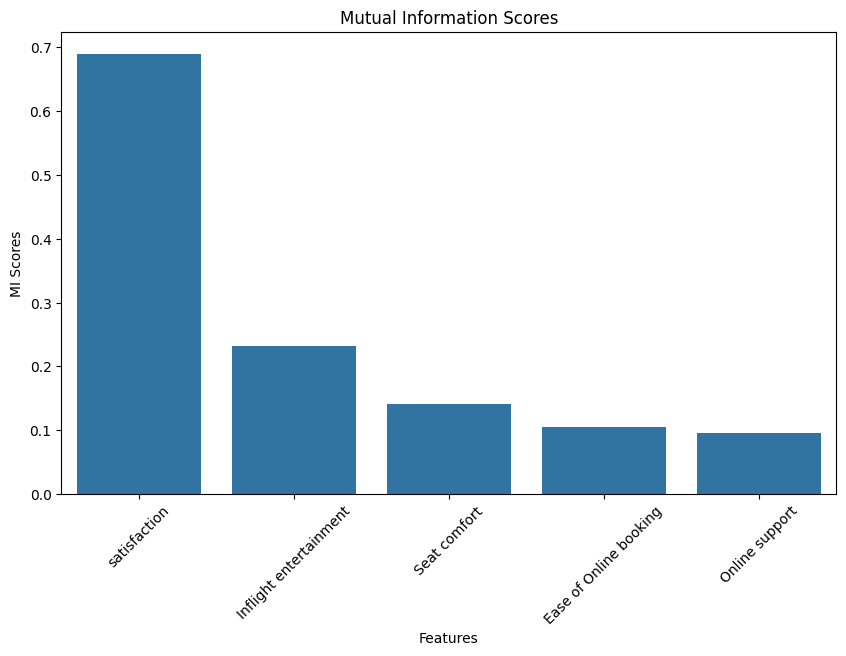

In [17]:
# visualization of mi scores
plt.figure(figsize=(10, 6))
sns.barplot(x=data.index, y=data.values)
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('MI Scores')
plt.xticks(rotation=45)
plt.show()

# Strategies for model deployment

In [19]:


data = [
    ["Rolling", "Predictive maintenance for machinery", "Customer lifetime value prediction"],
    ["Blue-Green", "Fraud transaction detection model", "Diagnostic model for medical images"],
    ["Shadow", "Anomaly detection in transactions", "Predictive analytics for marketing campaigns"],
    ["Canary", "Real-time recommendation system", "Customer feedback analysis"],
    ["Feature Flags", "New feature testing in mobile app", "Hash function for data searching"],
    ["Immutable", "Time series forecasting model", "Image processing model"],
    ["A/B Testing", "Website conversion rate optimization", "advertising campaign performance analysis"],
    
]

headers = ["Deployment Strategy", "Example Model 1", "Example Model 2"]

print(tabulate(data, headers=headers, tablefmt="grid"))



+-----------------------+--------------------------------------+----------------------------------------------+
| Deployment Strategy   | Example Model 1                      | Example Model 2                              |
+=======================+======================================+==============================================+
| Rolling               | Predictive maintenance for machinery | Customer lifetime value prediction           |
+-----------------------+--------------------------------------+----------------------------------------------+
| Blue-Green            | Fraud transaction detection model    | Diagnostic model for medical images          |
+-----------------------+--------------------------------------+----------------------------------------------+
| Shadow                | Anomaly detection in transactions    | Predictive analytics for marketing campaigns |
+-----------------------+--------------------------------------+----------------------------------------